<a href="https://colab.research.google.com/github/Hkhero79/HK-Hotel-booking-analysis/blob/main/HK_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [36]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
dir= '/content/drive/MyDrive/Hotel Booking Analysis/Hotel Bookings.csv'

In [38]:
df=pd.read_csv(dir)

In [39]:
# Head gives the top 5 entries which gives the overview of the dataset.
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [40]:
# Tail gives the last 5 entries from which we get a more clear picture about the the dataset.

df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [41]:
#  Shape gives the total entries of rows with their respective columns
df.shape

(119390, 32)

In [42]:
# summary of dataset
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [43]:
# information about data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [44]:
df_hotel=df.copy()

In [45]:
#checking the length of duplicat values
len(df_hotel[df_hotel.duplicated()])

31994

In [46]:
#dropping duplicate of from our data
df_hotel=df_hotel.drop_duplicates()

In [47]:
df_hotel.shape

(87396, 32)

In [48]:
df_hotel.count()

hotel                             87396
is_canceled                       87396
lead_time                         87396
arrival_date_year                 87396
arrival_date_month                87396
arrival_date_week_number          87396
arrival_date_day_of_month         87396
stays_in_weekend_nights           87396
stays_in_week_nights              87396
adults                            87396
children                          87392
babies                            87396
meal                              87396
country                           86944
market_segment                    87396
distribution_channel              87396
is_repeated_guest                 87396
previous_cancellations            87396
previous_bookings_not_canceled    87396
reserved_room_type                87396
assigned_room_type                87396
booking_changes                   87396
deposit_type                      87396
agent                             75203
company                            5259


In [49]:
#checking total null values
df_hotel.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [50]:
# dropping columns which have high null values and is of no use
df_hotel=df_hotel.drop(['agent','company'],axis=1)

In [51]:
#filling null values with 0
df_hotel=df_hotel.fillna(0)
df_hotel.count()

hotel                             87396
is_canceled                       87396
lead_time                         87396
arrival_date_year                 87396
arrival_date_month                87396
arrival_date_week_number          87396
arrival_date_day_of_month         87396
stays_in_weekend_nights           87396
stays_in_week_nights              87396
adults                            87396
children                          87396
babies                            87396
meal                              87396
country                           87396
market_segment                    87396
distribution_channel              87396
is_repeated_guest                 87396
previous_cancellations            87396
previous_bookings_not_canceled    87396
reserved_room_type                87396
assigned_room_type                87396
booking_changes                   87396
deposit_type                      87396
days_in_waiting_list              87396
customer_type                     87396


<function matplotlib.pyplot.show>

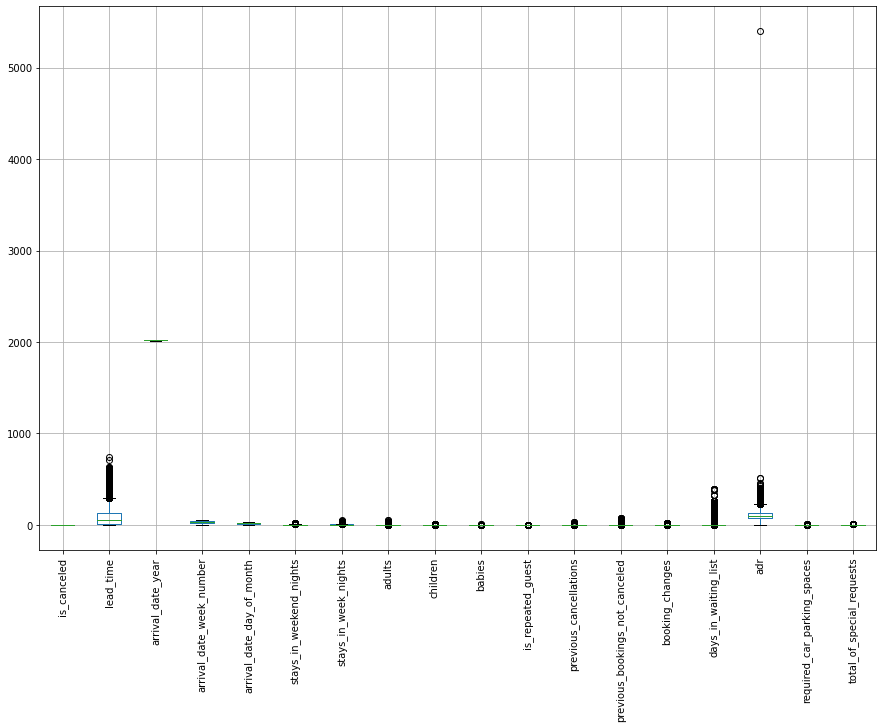

In [52]:
#checking outliers
plt.figure(figsize=(15,10))
df_hotel.boxplot()
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show>

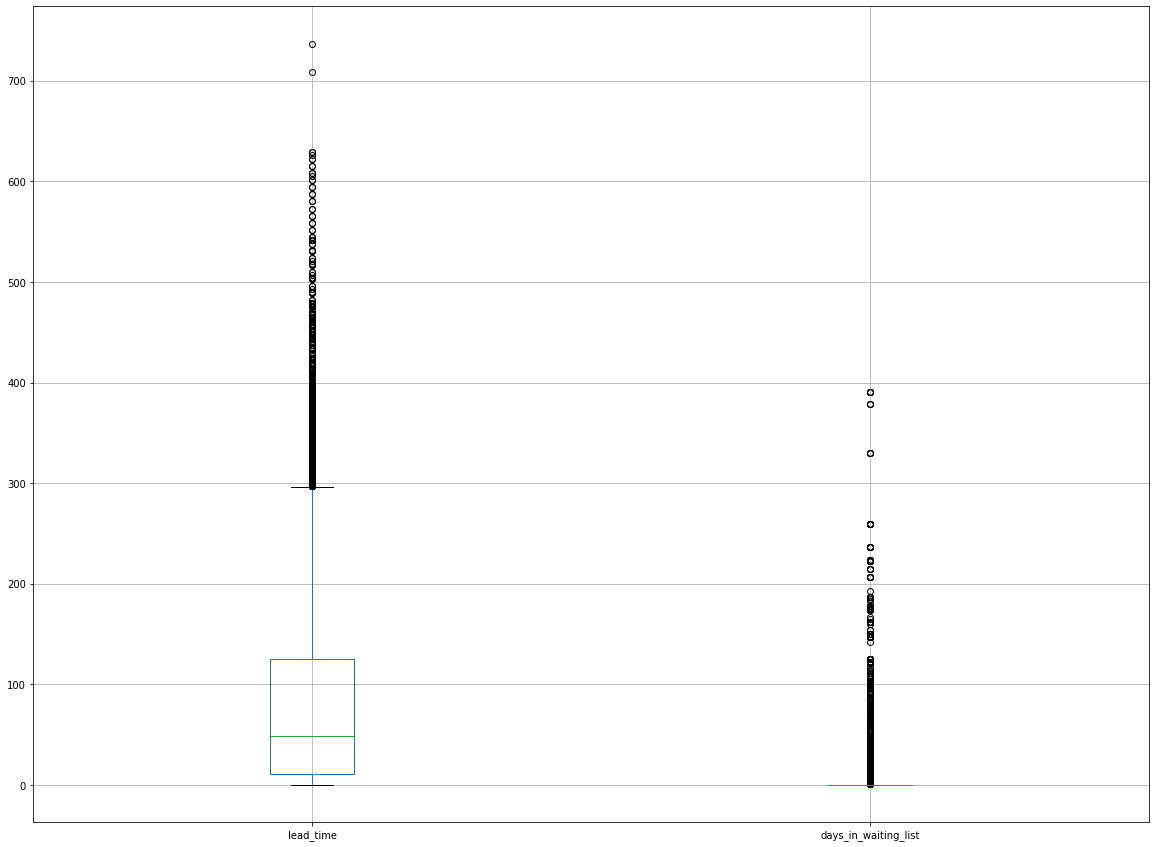

In [53]:
fig=plt.figure(figsize=(20,15))
ax=fig.gca()
df_hotel.boxplot(column=['lead_time','days_in_waiting_list'],ax=ax)
plt.show

In [54]:
#treatment of outliers
q1=df_hotel.quantile(0.25)
q3=df_hotel.quantile(0.75)
iqr=q3-q1
iqr


is_canceled                         1.0
lead_time                         114.0
arrival_date_year                   1.0
arrival_date_week_number           21.0
arrival_date_day_of_month          15.0
stays_in_weekend_nights             2.0
stays_in_week_nights                3.0
adults                              0.0
children                            0.0
babies                              0.0
is_repeated_guest                   0.0
previous_cancellations              0.0
previous_bookings_not_canceled      0.0
booking_changes                     0.0
days_in_waiting_list                0.0
adr                                62.0
required_car_parking_spaces         0.0
total_of_special_requests           1.0
dtype: float64

In [55]:
#dropping outliers
cols=['lead_time','adr']
df_hotel=df_hotel[~((df_hotel[cols]<(q1-1.5*iqr))|(df_hotel[cols]>(q3+1.5*iqr))).any(axis=1)]


In [56]:
iqr

is_canceled                         1.0
lead_time                         114.0
arrival_date_year                   1.0
arrival_date_week_number           21.0
arrival_date_day_of_month          15.0
stays_in_weekend_nights             2.0
stays_in_week_nights                3.0
adults                              0.0
children                            0.0
babies                              0.0
is_repeated_guest                   0.0
previous_cancellations              0.0
previous_bookings_not_canceled      0.0
booking_changes                     0.0
days_in_waiting_list                0.0
adr                                62.0
required_car_parking_spaces         0.0
total_of_special_requests           1.0
dtype: float64

In [57]:
df_hotel.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [58]:
df_hotel.shape

(82545, 30)

##**PROBLEM STATEMENT 1:CHECKING WHICH COUNTRY HAS HIGHEST NUMBER OF HOTEL BOOKINGS**

In [59]:
#checking the top_10_countries
top_10_countries = df_hotel[df_hotel['is_canceled']==0]['country'].value_counts()[:10].reset_index().rename(columns={'index':'country','country':'no_of_bookings'})



In [60]:
top_10_countries['percentage']=(top_10_countries['no_of_bookings']/top_10_countries['no_of_bookings'].sum())*100
top_10_countries.drop(columns=['percentage'])
top_10_countries

,country,no_of_bookings,percentage
0,PRT,16996,34.291018
1,GBR,7785,15.706965
2,FRA,6904,13.929465
3,ESP,5072,10.233234
4,DEU,4148,8.368977
5,IRL,2239,4.517392
6,ITA,1937,3.908078
7,BEL,1621,3.270519
8,NLD,1527,3.080865
9,USA,1335,2.693487


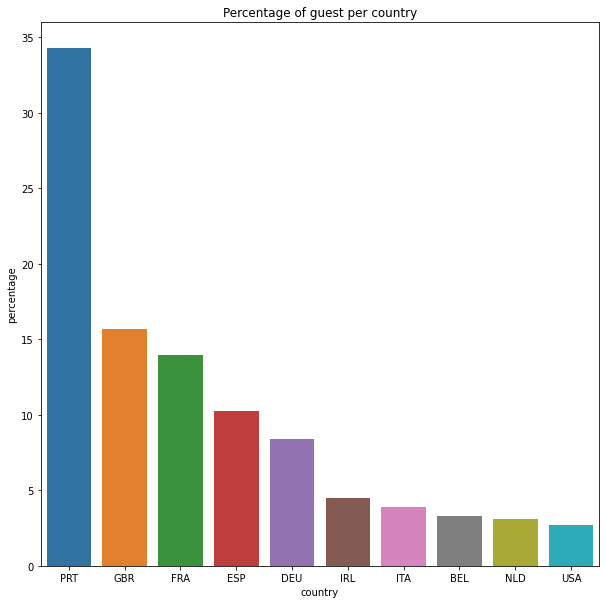

In [61]:
#plotting percentage of guest per country
plt.figure(figsize=(10,10))
sns.barplot(x="country", y="percentage", data=top_10_countries).set(title='Percentage of guest per country')
plt.show()


**CONCLUSION:FROM ABOVE GRAPH PLOT WE HAVE SEEN MOST VISITED COUNTRY IS PRT**


## **PROBLEM STATEMENT 2:WHICH IS BUSIEST MONTH FOR HOTEL AND RESORT**


Text(0.5, 1.0, 'Graph showing number of arrival per month')

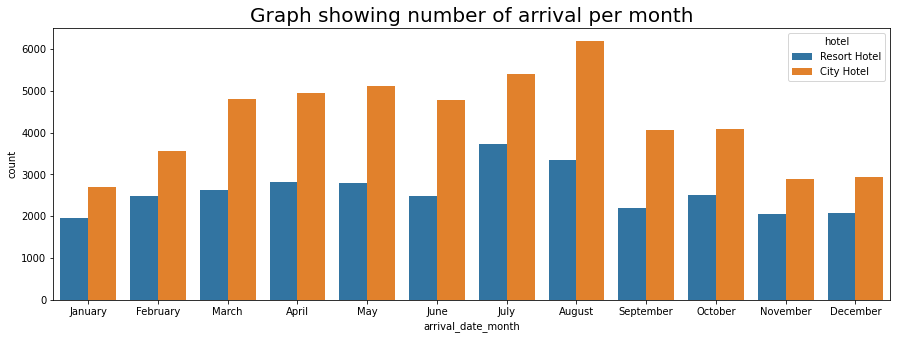

In [62]:
plt.figure(figsize=(15,5))

sns.countplot(data = df_hotel, x = 'arrival_date_month', hue = 'hotel', order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']).set_title('Graph showing number of arrival per month',fontsize=20)

## **CONCLUSION: FROM ABOVE GRAPH WE SEE THAT THE BUSIEST MONTH IS AUGUST FOR HOTELS AND RESORT**



## **PROBLEM STATEMENT 3:BETWEEN RESORT AND HOTEL WHICH HAS HIGHEST CANCELLATION**

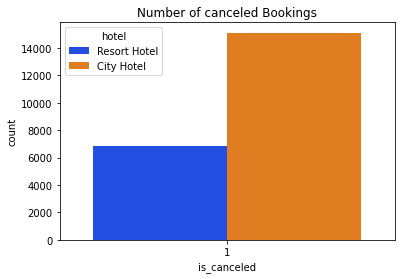

In [63]:
cancel_room=df_hotel[df_hotel['is_canceled']==1]
sns.countplot(data=cancel_room,x='is_canceled', hue='hotel', palette='bright').set_title('Number of canceled Bookings')
plt.show()

# **CONCLUSION:FROM ABOVE PLOT WE SEE THAT HOTEL HAVE MORE CANCELATION THAN RESORT**

# **PROBLEM STATEMENT 4:WHICH MEALS ARE MORE PREFERABLE**

In [64]:
labels = df_hotel['meal'].value_counts()
print(f'most meal preferable is {labels}' )
labels.max()

most meal preferable is BB           64697
SC            9371
HB            7734
Undefined      452
FB             291
Name: meal, dtype: int64


64697

Text(0, 0.5, 'booking')

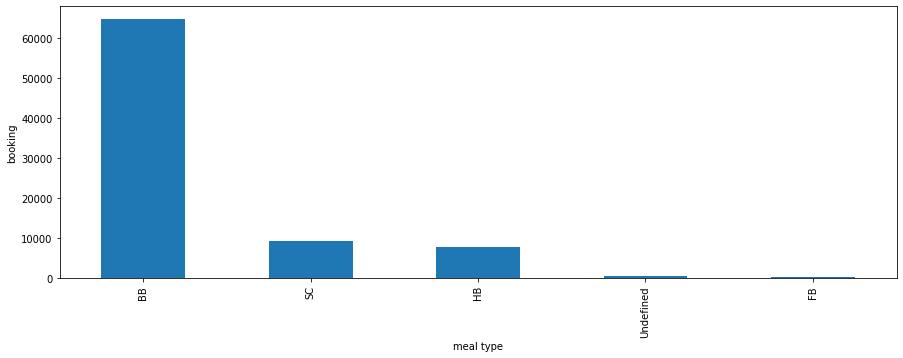

In [65]:
#
plt.figure(figsize=(15,5))
labels.plot(kind='bar')
plt.xlabel('meal type')
plt.ylabel('booking')

# **CONCLUSION:FROM ABOVE GRAPH WE SEE THAT MOST PREFERRED MEALS IS BB( BREAKFAST WITH BED)**


# **PROBLEM STATEMENT 5: BOOKING AND CANCELLATION PER MARKET SEGMENT**


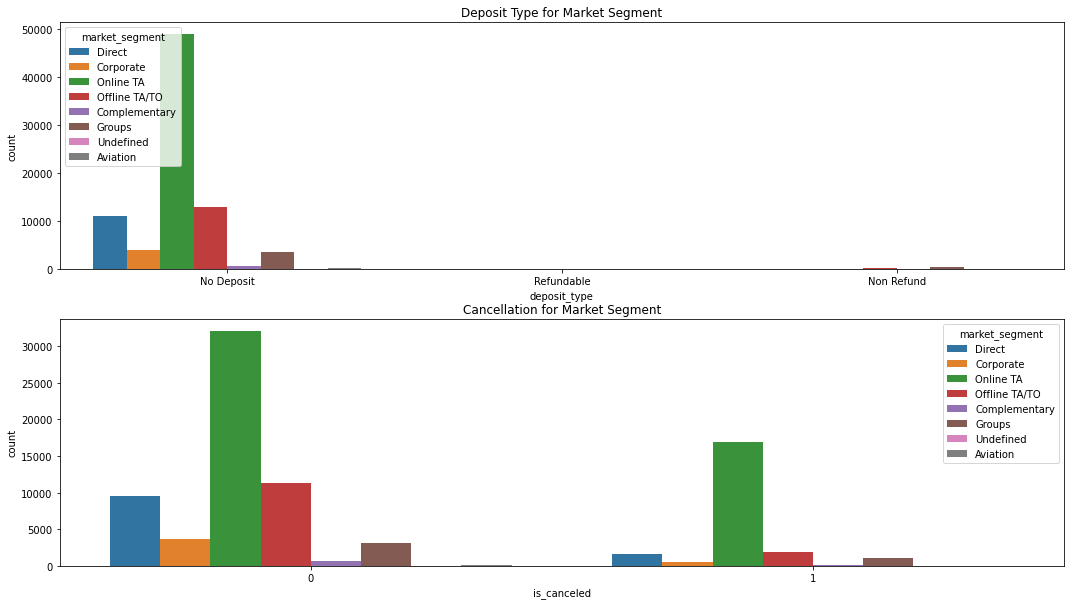

In [66]:
plt.figure(figsize=(18,10))
plt.subplot(211)
sns.countplot(data=df_hotel,x='deposit_type',hue='market_segment')
plt.title('Deposit Type for Market Segment')

plt.subplot(212)
sns.countplot(data=df_hotel,x='is_canceled',hue='market_segment')
plt.title('Cancellation for Market Segment')
plt.show()


# **CONCLUSION:FROM ABOVE GRAPHS WE CAN SEE THAT MOST BOOKINGS AND CANCELLATION IS THROUGH ONLINE TA SEGMENT**

# **problem statement 6:How long does guest stay at hotel on weekends and weekdays**

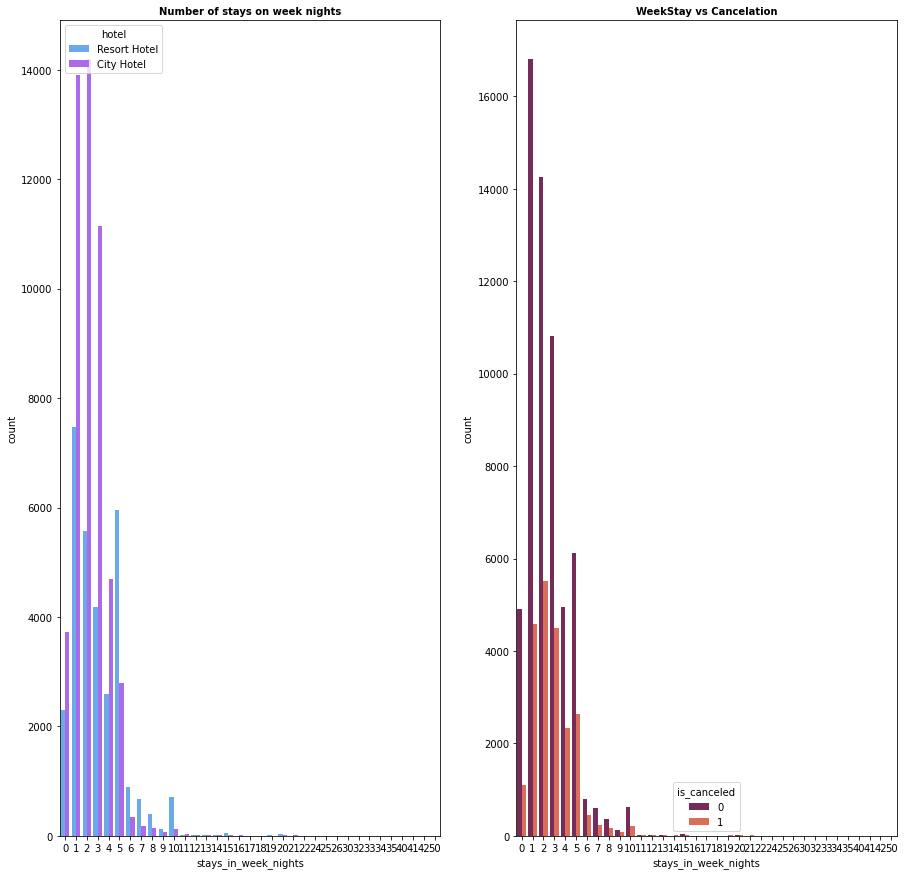

In [67]:
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
sns.countplot(data = df_hotel, x = 'stays_in_week_nights',hue='hotel' ,palette='cool')
plt.title("Number of stays on week nights",fontweight="bold", size=10)
plt.subplot(1, 2, 2)
sns.countplot(data = df_hotel, x = 'stays_in_week_nights', hue='is_canceled', palette='rocket')
plt.title('WeekStay vs Cancelation',fontweight="bold", size=10)

plt.show()

# **conclusion:we can see from graph that most people are staying at hotel for 2 nights in week days**
# **And second graph is showing that most cancellation is done for room which is booked for 2 night stay and we also see that most booking were not cancelled for 1 night stay**


# **problem statement 7:Type of customer**

In [68]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82545 entries, 2 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           82545 non-null  object 
 1   is_canceled                     82545 non-null  int64  
 2   lead_time                       82545 non-null  int64  
 3   arrival_date_year               82545 non-null  int64  
 4   arrival_date_month              82545 non-null  object 
 5   arrival_date_week_number        82545 non-null  int64  
 6   arrival_date_day_of_month       82545 non-null  int64  
 7   stays_in_weekend_nights         82545 non-null  int64  
 8   stays_in_week_nights            82545 non-null  int64  
 9   adults                          82545 non-null  int64  
 10  children                        82545 non-null  float64
 11  babies                          82545 non-null  int64  
 12  meal                           

In [69]:

df['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

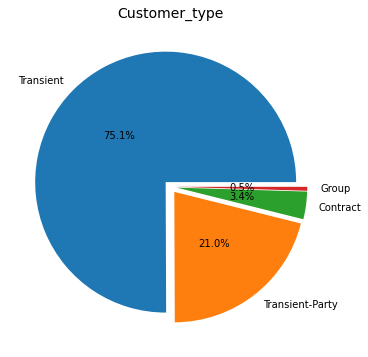

In [70]:
customer_count = df['customer_type'].value_counts()
customer_labels = df['customer_type'].value_counts().index.tolist()
#Using matplotlib
pie, ax = plt.subplots(figsize=[6,6])
plt.pie(customer_count, autopct="%.1f%%", explode=[0.05]*4, labels=customer_labels, pctdistance=0.5)
plt.title("Customer_type", fontsize=14);

# **Conclusion:most customer are of transient type**

# **INSIGHTS FROM ANALYSIS:**
# **Resort hotels tend to have less bookings in comparison to city hotels   they   need to work on their marketing strategy and promote the hotels more, especially on social media**
# **Resort hotels could also reduce prices to increases booking percentages.**

# **May-August happens to be the busiest months but so the hotels should target more customers and try to do more business during these times.**

# **Although city hotels have more bookings, they also tend to have more cancellations so to prevent this they could take advance money during vacation. This would ensure most bookings to not being cancelled. They could also apply no-refund policies or make the refund policies rather strict so the customers choose not to cancel**

